# Pandas로 국민청원 데이터 분석하기 (양다혜)

### 0. 패키지 설치하기 / 불러오기

In [36]:
pip install plotly

In [38]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [87]:
import plotly.io as pio
pio.renderers.default = 'notebook_connected'   

import numpy as np
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import plotly.express as px

from datetime import date, timedelta

import plotly.offline as py

import folium 
from folium import plugins

import warnings
warnings.filterwarnings("ignore")

import os

### 1. 데이터 불러오기

In [8]:
df = pd.read_csv('https://s3.ap-northeast-2.amazonaws.com/data10902/petition/petition.csv', parse_dates=['start', 'end'])

### 2. 데이터 파악하기

#### (1) 총 행의 개수가 395547, 열의 개수가 8인 데이터이다.

In [7]:
df.shape

(395547, 8)

#### (2) 많은 양의 데이터를 한 눈에 알아보기 위해 앞 행 5개, 뒷 행 5개를 추출하여 대략적으로 내용을 파악하였다.

In [11]:
df.head()

,article_id,start,end,answered,votes,category,title,content
0,21,2017-08-19,2017-11-17,0,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...
1,22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...
2,23,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."
3,24,2017-08-19,2017-08-26,0,53,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...
4,25,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."


In [13]:
df.tail()

,article_id,start,end,answered,votes,category,title,content
395542,517117,2019-02-04,2019-03-06,0,3,보건복지,명절연휴 고속도로 무료반대,명절고속도로 무료보단 대다수의 서민들이 이용하는 대중교통 무료와 명절기간 증차로 했...
395543,517119,2019-02-04,2019-03-06,0,23,보건복지,광주사태 가짜 유공자들 정수기로 걸려내야함,광주사태 유공자들 차고 넘치는데 이래 많은 유공자들 그냥놓아두면 재앙이다.\n김대중...
395544,517120,2019-02-04,2019-03-06,0,0,안전/환경,환경문제,명절이면 후로 제일문제는 쓰레기 문제 입니다.\n제일문제는 선물세트와 농산물세트 입...
395545,517121,2019-02-04,2019-03-06,0,20,정치개혁,"청화대,더불어민주당, 당장 답하라,,,,,,","좌파 더불어민주당, 좌파 정권 청화대는 선한 국민들을 더는 기망하지 말고 담장 답하..."
395546,517122,2019-02-04,2019-03-06,0,16,인권/성평등,여성부 폐지,국민들이 원합니다\n폐지 좀 시키세요;


#### (3) 열 변수는 article_id, start, end, answered, votes, category, title, content로 구성되어있다.

In [12]:
df.columns

Index(['article_id', 'start', 'end', 'answered', 'votes', 'category', 'title',
       'content'],
      dtype='object')

#### (4) content 변수에 결측치가 하나 있음을 알 수 있다.

In [14]:
df.isnull().sum()

article_id    0
start         0
end           0
answered      0
votes         0
category      0
title         0
content       1
dtype: int64

#### (5) 수치형 데이터의 요약은 다음과 같다.

In [15]:
df.describe()

,article_id,answered,votes
count,395547.000000,395547.000000,3.955470e+05
mean,251608.934635,0.000073,1.501188e+02
std,153219.216242,0.008562,4.802583e+03
min,21.000000,0.000000,0.000000e+00
25%,115236.500000,0.000000,2.000000e+00
50%,253682.000000,0.000000,5.000000e+00
75%,386137.500000,0.000000,1.500000e+01
max,517122.000000,1.000000,1.192049e+06


#### (6) 카테고리 형태의 데이터 요약은 다음과 같다.

In [16]:
df.describe(include=np.object)

,category,title,content
count,395547,395547,395546
unique,17,346524,375224
top,정치개혁,이명박 출국금지,이명박 출국금지
freq,62750,3018,597


#### (7) 답변대상인 청원 보기 
* 20만건 이상 투표를 받으면 답변 대상 청원이 된다.

In [19]:
df_20 = df.loc[df['votes'] > 200000]
df_20.shape

(80, 8)

* 답변대상이 된 청원들의 분야는 다음과 같다.

In [21]:
df_20.category.value_counts()

인권/성평등         24
안전/환경          10
기타              8
정치개혁            8
문화/예술/체육/언론     7
외교/통일/국방        4
반려동물            4
보건복지            3
육아/교육           3
교통/건축/국토        3
경제민주화           2
성장동력            2
미래              1
행정              1
Name: category, dtype: int64

### 3. 데이터 분석하기 

#### (1)  20만건 이상의 투표율로 답변대상이 된 청원들을 분야별로 나타낸 pie chart

In [60]:
def pie_chart(data, col, title = ''):
    cnt_df = data[col].value_counts().reset_index()
    fig = px.pie(cnt_df, 
                 values = col, 
                 names = 'index', 
                 title = title, 
                 template = 'seaborn',
                 color_discrete_sequence=px.colors.sequential.RdBu)
    fig.update_traces(rotation=90, pull=0.05, textinfo="value+percent+label")
    fig.show()

In [49]:
pie_chart(df_20,'category',title='답변대상 국민청원의 분야별 비율')

* 인권/성평등 관련한 청원글이 30%, 안전/환경 청원글이 12.5%로 답변대상 청원의 분야 1, 2위를 차지한다.

#### (2) 전체 청원의 분야를 나타낸 pie chart

In [51]:
pie_chart(df,'category',title='전체 국민청원의 분야별 비율')

* 앞선 그래프와는 다르게 전체 국민 청원의 분야 1,2위는 정치개혁(15.9%), 기타(12.3%)이다.
* 20만건 이상의 투표율로 답변이 된 국민 청원의 분야 1,2위는 인권/성평등, 안전/환경임을 보아 국민들의 개선요구 분야를 알 수 있다.

#### (3) 답변대상이 된 청원들 중 답변을 받은 청원들을 알아보고 투표 수가 답변 여부에 영향을 끼치는지 알아보기

In [67]:
answered=df_20[df_20["answered"]==1]
notanswered=df_20[df_20["answered"]==0]

In [69]:
answered.votes.describe()

count        29.000000
mean     280025.689655
std      108390.808396
min      201590.000000
25%      217054.000000
50%      235372.000000
75%      281985.000000
max      615354.000000
Name: votes, dtype: float64

In [70]:
notanswered.votes.describe()

count    5.100000e+01
mean     2.817428e+05
std      1.558871e+05
min      2.025480e+05
25%      2.144700e+05
50%      2.334950e+05
75%      2.903815e+05
max      1.192049e+06
Name: votes, dtype: float64

- 실제로 답변을 받은 청원의 투표 수 평균 : 280025  / 중앙값: 235372
- 답변을 받지 못한 청원의 투표 수 평균   : 281742  / 중앙값: 233495
* 이를 통해 답변을 받는지 안 받는지 여부에 투표 수는 큰 영향은 끼치지 않음을 알수 있다.

#### (4) 투표율이 가장 높은 분야인 인권/성평등 중 답변을 받지 못한 청원들을 알아보기

In [78]:
notanswered[df_20["category"]=='인권/성평등']

,article_id,start,end,answered,votes,category,title,content
193251,244045,2018-05-25,2018-06-24,0,240618,인권/성평등,무고죄 특별법의 제정을 촉구합니다.,최근 위계/권력에 의한 성범죄에 저항하기 위한 미투운동이 일부에 의하여 심각하게 변...
194822,246489,2018-05-28,2018-06-27,0,217143,인권/성평등,대검찰청의 불법적인 성폭력 수사메뉴얼 중단을 요청합니다.,"오늘 뉴스를 보니 대검찰청의 황당한 수사메뉴얼 개정안을 보게되었습니다.\n""성폭력을..."
227227,294226,2018-07-03,2018-08-02,0,208202,인권/성평등,여고생이 중고생8명에게 관악산끌려가 집단폭행을당했습니다 소년법폐지또는 개정청원합니다,서울에서 여고생이 관악산에끌려가 집단폭행을당했습니다\n안녕하세요 티비에서만 나오던 ...
248925,322420,2018-07-29,2018-08-28,0,208543,인권/성평등,웹하드 카르텔과 디지털성범죄 산업에 대해 특별 수사를 요구한다.,- 정부는 7월 28일 '그것이 알고싶다' 방송으로 드러난 웹하드 카르텔을 수사하라...
284574,369690,2018-09-06,2018-10-06,0,330587,인권/성평등,제 남편의 억울함을 풀어주세요!,제 남편이 어제 재판에서 징역6개월을 받고 그 자리에서 법정구속 되었습니다\n어제 ...
305378,398030,2018-10-04,2018-11-03,0,257471,인권/성평등,성범죄피해자의 집주소와 주민번호등을 가해자에게 보내는 법원을 막아주세요,안녕하세요 저는 24살 95년생 여성입니다.\n2015년도에 준강간을 당해서 고소를...
316569,412722,2018-10-20,2018-11-19,0,261418,인권/성평등,조두순의 출소를 반대합니다,제 얘기를 하기에 앞서 요즘 페이스북이라는 sns에서 화제가 되고 있는 글을 하나 ...
318234,414891,2018-10-22,2018-11-21,0,256004,인권/성평등,5년 전 여성의 질과 항문에 팔을 넣어 사망에 이르게 한 사건의 재조사를 요구합니다,[ 1 ]\n본 사건은 2013년 38세 남성이 직장 내 동료인 38세 여성과 퇴근...
327873,426834,2018-10-31,2018-11-30,0,416093,인권/성평등,"132cm, 31kg의 왜소한 50대 여성이 180cm가 넘는 건장한 20세 남성에...",http://m.news1.kr/articles/?3464603\n관련 기사입니다....
335887,436901,2018-11-09,2018-12-09,0,206447,인권/성평등,부하 여군을 강간한 두 명의 해군 간부를 처벌해주십시오.,2010년 9월경 해군 중위가 직속상관에게 상습적 강간과 강제 추행을 당한 사건이 ...


In [77]:
pie_chart(notanswered,'category',title='답변대상청원이었지만 답변을 받지 못한 청원의 분야별 비율')

* 답변대상청원이었지만 답변을 받지 못한 청원의 분야 1위는 인권/성평등이다.
* 국민들이 공감하여 투표율이 가장 높았던 청원의 분야가 인권/성평등이었음에도 불구하고 답변을 받지 못하였다.
* 정부는 국민들의 요구에 대해 귀 기울일 필요가 있다.

#### (5) 월별 청원 수와 투표 수 알아보기

In [85]:
df_month = pd.DataFrame(df)
df_month['month'] = df['start'].dt.month

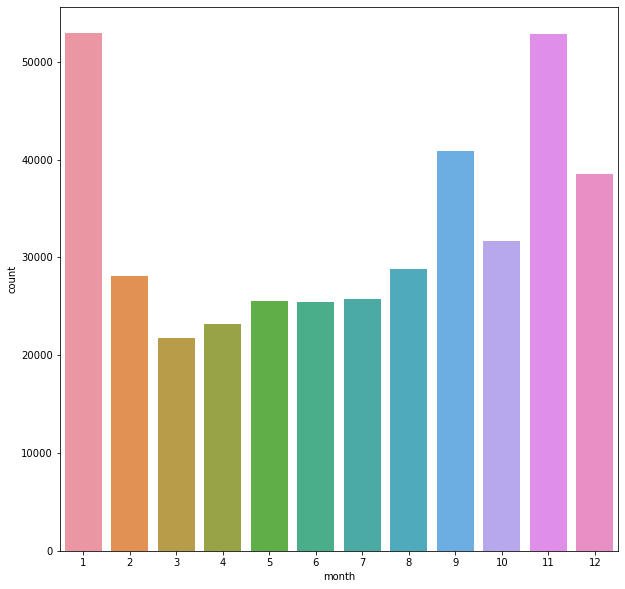

In [92]:
graph = plt.subplots(figsize=(10,10))
graph = sns.countplot('month',data=df_month)

* 1월과 11월에 청원 글이 가장 많이 올라왔었음을 알 수 있다.

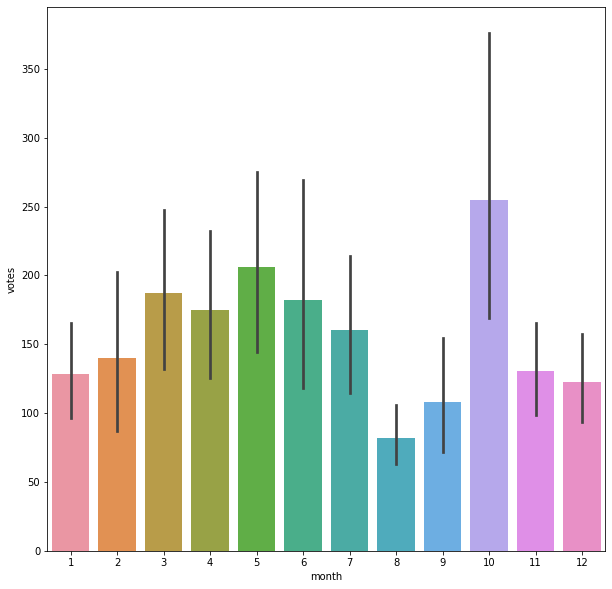

In [93]:
graph2 = plt.subplots(figsize=(10,10))
graph2 = sns.barplot(x='month',y='votes',data=df_month)

* 10월이 청원 투표 수가 가장 많다.
* 월별로 plot을 그려본 결과 올라온 청원의 개수와 투표 수에는 큰 상관관계가 없는 것 같다.